**Домашнее задание** - Фильтрация картинок при помощи pytorch torch.nn.Conv2d

Прочитайте внимательно статью про то, что такое свёртка:

https://programforyou.ru/poleznoe/convolutional-network-from-scratch-part-zero-introduction

In [1]:
import torch
import torch.nn as nn
from PIL import Image
from torchvision import transforms

Пусть задана цветная картинка с изображением бабочки:

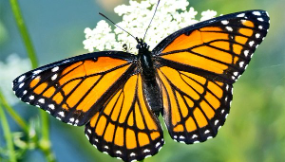

In [2]:
filename = './image.png'
image = Image.open(filename)
image = image.convert('RGB')
image

Цель задания в том, чтобы реализовать функцию, которая бы по заданным входному изображению и матрицей размера 3x3, получала бы фильтрованное изображение, как на рисунке ниже:

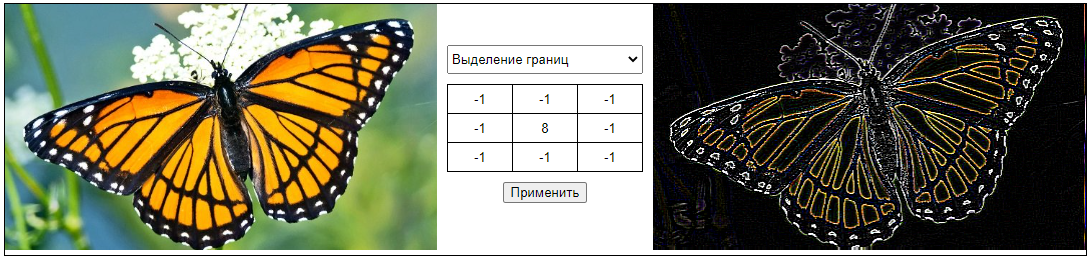

In [5]:
filename = './laplace filter.png'
filter_example = Image.open(filename)
filter_example = filter_example.convert('RGB')
filter_example

Для реализации фильтра необходимо использовать свёртку, которая осуществляется модулем 'torch.nn.Conv2d'. В созданном объекте необходимо заменить имеющиеся веса на заданные веса фильтра, как в примере ниже:

In [6]:
conv_model = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=3, 
                       padding=2, stride=1, bias=False) # - конволюционный слой
print('Исходные случайные веса в слое:')
print(conv_model.weight.shape)

Исходные случайные веса в слое:
torch.Size([1, 3, 3, 3])


In [7]:
W = torch.tensor([[[0.,0,0],[0,1,0],[0,0,0]], 
                  [[0.,0,0],[0,0,0],[0,0,0]],
                  [[0.,0,0],[0,0,0],[0,0,0]]])


with torch.no_grad():
    conv_model.weight.copy_(W)

print('Новые веса в слое:')
print(conv_model.weight)

Новые веса в слое:
Parameter containing:
tensor([[[[0., 0., 0.],
          [0., 1., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]]], requires_grad=True)


Также необходимо научиться использовать стандартные трансформации из модуля 'torchvision.transforms' для того, чтобы преобразовывать картинку из формата, возвращаемого библиотекой 'PIL.Image' в 'torch.Tensor':
- transforms.ToTensor()
- transforms.ToPILImage()

In [8]:
t1 = transforms.ToTensor()
tensor_image = t1(image)
tensor_image.shape

torch.Size([3, 162, 285])

In [9]:
tensor_image = tensor_image.unsqueeze(dim=0)
tensor_image.shape

torch.Size([1, 3, 162, 285])

In [10]:
result = conv_model(tensor_image)
#result

In [11]:
result.shape

torch.Size([1, 1, 164, 287])

In [12]:
result = result.squeeze(dim=0)
result.shape
result = torch.max(result,torch.tensor([0]))/torch.max(result)
result

tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.2627, 0.2549,  ..., 0.5686, 0.5686, 0.0000],
         [0.0000, 0.2706, 0.2627,  ..., 0.5608, 0.5608, 0.0000],
         ...,
         [0.0000, 0.3216, 0.2941,  ..., 0.4118, 0.4196, 0.0000],
         [0.0000, 0.3412, 0.3098,  ..., 0.4000, 0.4118, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
       grad_fn=<DivBackward0>)

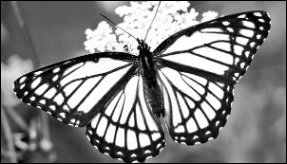

In [13]:
t2 = transforms.ToPILImage()
new_image = t2(result)
new_image

В данном примере преобразования привели к чёрно-белой одно-канальной картинке. Ваша же задача состоит в том, чтобы картинка после применения фильтра оставалась цветной трёх-канальной, а фильтр применялся к каждому из каналов по-отдельности.

Более того, результат применения фильтров должен совпадать с теми, что показаны в статье (ссылка на статью в самом вверху).

In [14]:
def ImageFiter(w,image):
    conv_model = nn.Conv2d(in_channels=3, out_channels=3,groups=3, kernel_size=3, 
                       padding=1, stride=1, bias=False)
    with torch.no_grad():
        conv_model.weight.copy_(w)
    t1 = transforms.ToTensor()
    tensor_image = t1(image)
    tensor_image = tensor_image.unsqueeze(dim=0)
    result = conv_model(tensor_image)
    result = result.squeeze(dim=0)
    result = torch.max(result,torch.tensor([0]))/torch.max(result)
    t2 = transforms.ToPILImage()
    return  t2(result)

    

## Повышение резкость

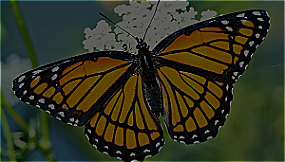

In [15]:
w1 = torch.tensor([[[[-1,-4,-1],[-4,26,-4],[-1,-4,-1]]], 
                  [[[-1,-4,-1],[-4,26,-4],[-1,-4,-1]]],
                  [[[-1,-4,-1],[-4,26,-4],[-1,-4,-1]]]])
ImageFiter(w1,image)

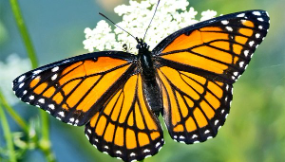

In [16]:
image

## Выделение границ

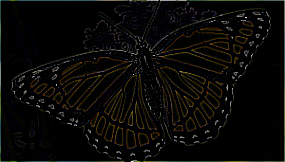

In [17]:
w2 = torch.tensor([[[[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]], 
                  [[[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]],
                  [[[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]]])
ImageFiter(w2,image)

## Выделение границ по X

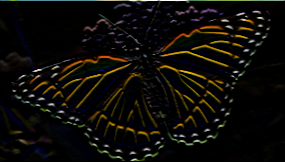

In [18]:
w3 = torch.tensor([[[[-1,-2,-1],[0,0,0],[1,2,1]]], 
                  [[[-1,-2,-1],[0,0,0],[1,2,1]]],
                  [[[-1,-2,-1],[0,0,0],[1,2,1]]]])
ImageFiter(w3,image)

## Размытие

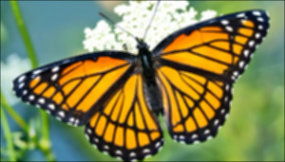

In [19]:
w4 = torch.tensor([[[[0.1,0.1,0.1],[0.1,0.1,0.1],[0.1,0.1,0.1]]], 
                     [[[0.1,0.1,0.1],[0.1,0.1,0.1],[0.1,0.1,0.1]]],
                     [[[0.1,0.1,0.1],[0.1,0.1,0.1],[0.1,0.1,0.1]]]])
ImageFiter(w4,image)

## Размытие Гаусса

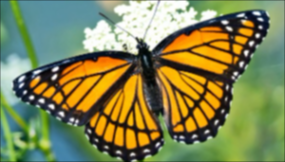

In [20]:
w5 = torch.tensor([[[[0.05,0.1,0.05],[0.1,0.2,0.1],[0.05,0.1,0.05]]], 
                              [[[0.05,0.1,0.05],[0.1,0.2,0.1],[0.05,0.1,0.05]]],
                              [[[0.05,0.1,0.05],[0.1,0.2,0.1],[0.05,0.1,0.05]]]])

ImageFiter(w5,image)

## другие фильтры

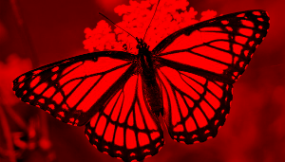

In [21]:
w6 = torch.tensor([[[[0,0,0],[0,1,0],[0,0,0]]], 
                    [[[0,0,0],[0,0,0],[0,0,0]]],
                    [[[0,0,0],[0,0,0],[0,0,0]]]])

ImageFiter(w6,image)

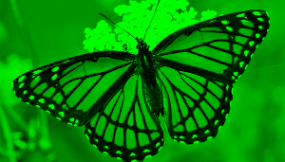

In [22]:
w7 = torch.tensor([[[[0,0,0],[0,0,0],[0,0,0]]], 
                      [[[0,0,0],[0,1,0],[0,0,0]]],
                      [[[0,0,0],[0,0,0],[0,0,0]]]])

ImageFiter(w7,image)

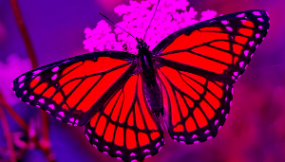

In [23]:
w8 = torch.tensor([[[[0,0,0],[0,1,0],[0,0,0]]], 
                       [[[0,0,0],[0,0,0],[0,0,0]]],
                       [[[0,0,0],[0,1,0],[0,0,0]]]])

ImageFiter(w8,image)

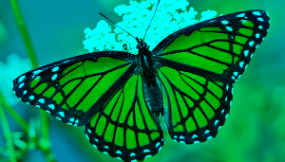

In [24]:
w8 = torch.tensor([[[[0,0,0],[0,0,0],[0,0,0]]], 
                           [[[0,0,0],[0,1,0],[0,0,0]]],
                           [[[0,0,0],[0,1,0],[0,0,0]]]])

ImageFiter(w8,image)

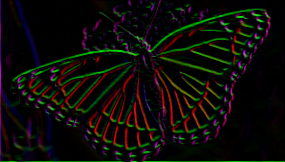

In [25]:
w9 = torch.tensor([[[[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]],
                     [[[1, 1, 1], [0, 0, 0], [-1, -1, -1]]],
                     [[[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]]])

ImageFiter(w9,image)